<a href="https://colab.research.google.com/github/dsong56/ds2002/blob/main/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [2]:
import sqlite3
connection = sqlite3.connect('superhero_db.sqlite')
cursor = connection.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  power TEXT NOT NULL,
  team TEXT NOT NULL
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  evil_plan TEXT NOT NULL
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  hero_id INTEGER,
  villain_id INTEGER,
  outcome TEXT NOT NULL,
  FOREIGN KEY (hero_id) REFERENCES heroes(id),
  FOREIGN KEY (villain_id) REFERENCES villains(id)
)
''')

## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [3]:
import pandas as pd

heroes = pd.read_csv('heroes.csv')
villains = pd.read_csv('villains.csv')
battles = pd.read_csv('battles.csv')

heroes.to_sql('heroes', connection, if_exists='replace', index=False)
villains.to_sql('villains', connection, if_exists='replace', index=False)
battles.to_sql('battles', connection, if_exists='replace', index=False)

print(heroes.head())
print(villains.head())
print(battles.head())

   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [4]:
cursor.execute('''
SELECT name, power FROM heroes
''')
cursor.fetchall()

[('Spider-Man', 'Web-slinging'),
 ('Iron Man', 'Powered Armor'),
 ('Batman', 'Genius Detective'),
 ('Superman', 'Super Strength'),
 ('Thor', 'God of Thunder'),
 ('Wonder Woman', 'Amazonian Strength'),
 ('Black Panther', 'Enhanced Agility'),
 ('The Flash', 'Super Speed'),
 ('Hulk', 'Super Strength'),
 ('Doctor Strange', 'Mystic Arts')]

In [5]:
cursor.execute('''
SELECT * FROM battles
WHERE outcome = 'Hero Wins'
''')
cursor.fetchall()

[(2, 9, 3, 'Hero Wins'),
 (5, 1, 7, 'Hero Wins'),
 (7, 9, 8, 'Hero Wins'),
 (8, 3, 2, 'Hero Wins'),
 (9, 7, 5, 'Hero Wins'),
 (13, 8, 9, 'Hero Wins'),
 (20, 3, 4, 'Hero Wins'),
 (29, 3, 5, 'Hero Wins'),
 (30, 5, 5, 'Hero Wins')]

In [6]:
cursor.execute('''
SELECT name, evil_plan FROM villains
''')
cursor.fetchall()

[('Green Goblin', 'Terrorize New York'),
 ('Thanos', 'Collect all Infinity Stones'),
 ('Joker', 'Spread chaos in Gotham'),
 ('Lex Luthor', 'Defeat Superman'),
 ('Loki', 'Trick humanity into worshiping him'),
 ('Ultron', 'AI world domination'),
 ('Darkseid', 'Control the universe'),
 ('Venom', 'Consume Spider-Man'),
 ('Magneto', 'Mutant supremacy'),
 ('Red Skull', 'Revive Hydra')]

In [7]:
cursor.execute('''
SELECT heroes.name, COUNT(battles.hero_id) AS fought FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
ORDER BY fought DESC
''')
cursor.fetchone()

('Batman', 7)

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [9]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  hero_id INTEGER NOT NULL,
  name TEXT NOT NULL,
  FOREIGN KEY (hero_id) REFERENCES heroes(id)
)
''')

sidekick_data = [
    (1, 'Miles Morales'),
    (2, 'Peter Parker'),
    (3, 'Dick Grayson'),
    (3, 'Jason Todd'),
    (3, 'Tim Drake')
]

cursor.executemany('''
INSERT INTO sidekicks (hero_id, name)
VALUES (?, ?)
''', sidekick_data)

connection.commit()

cursor.execute('''
SELECT heroes.name, MAX(sidekicks.hero_id) FROM heroes
JOIN sidekicks ON heroes.id = sidekicks.hero_id
GROUP BY heroes.name
ORDER BY sidekicks.hero_id DESC
''')
result = cursor.fetchone()
print(result[0], "has the most sidekicks, with", result[1])

Batman has the most sidekicks, with 3


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

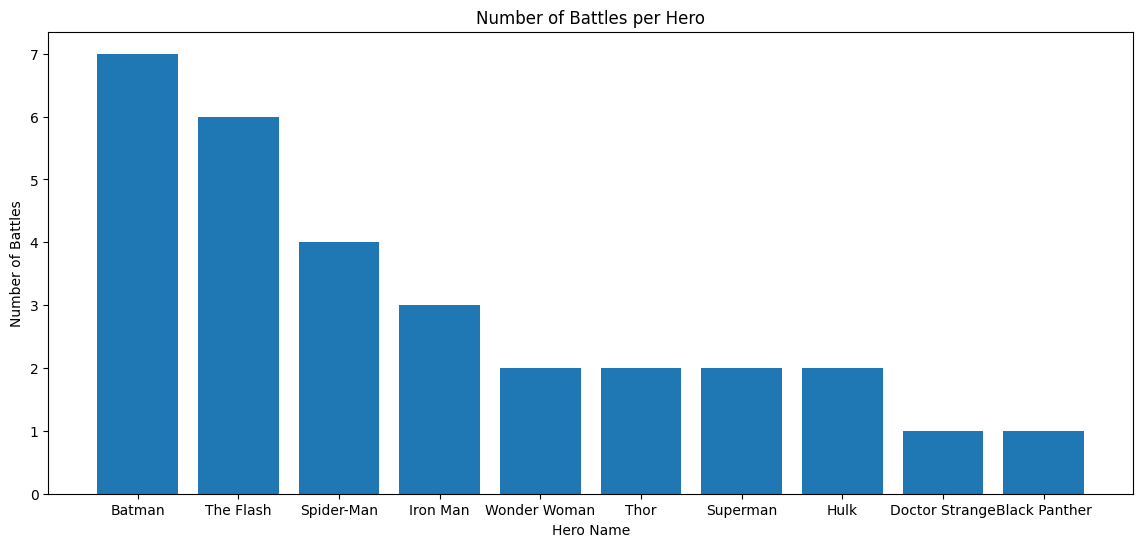

In [19]:
import matplotlib.pyplot as plt

cursor.execute('''
SELECT heroes.name, COUNT(battles.hero_id) AS fought FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
ORDER BY fought DESC
''')

battle_counts = cursor.fetchall()

names = []
counts = []

for row in battle_counts:
  names.append(row[0])
  counts.append(row[1])

plt.figure(figsize=(14, 6))
plt.bar(names, counts)
plt.xlabel('Hero Name')
plt.ylabel('Number of Battles')
plt.title('Number of Battles per Hero')
plt.show()

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!